# Skyrmions on PdFe on Ir(111) systems 

We are trying to get a skyrmion in a Fe on Ir(111) system, using the micromagnetic theory. This  is necessary to reproduce the results of [1] regarding skyrmion switching times, which we will try to describe using the NEB method.

The Fe monolayer crystallographic arrangement is represented by a **hexagonal lattice**, thus we can use standard formulas to get the parameters in the continuum model. Starting with the Hamiltonian

$$ H = -\sum_{\langle i,j \rangle}^{N} J_{ij} \mathbf{s}_i \cdot \mathbf{s}_j
   -\sum_{\langle i,j \rangle}^{N} D_{ij} \left[ \mathbf{s}_i \times \mathbf{s}_j \right] 
   + K \sum_{i}^{N} \left(s^{(i)}_{z}\right)^2
   -\sum_{i}^{N} \mu_i \mathbf{B} \cdot \mathbf{s}_i
$$

(notice the summation $\langle i,j \rangle$ refers to counting the interactions only *once* per pair of neighbouring spins) the corresponding micromagnetic parameters are

$$
A = \frac{\sqrt{2}J_{ij}}{a} \qquad D = \frac{\sqrt{3} D_{ij}}{a a_z} 
\qquad K_u = \frac{\mu}{\frac{\sqrt{3}}{2}a^2 a_z}
\qquad M_S = \frac{\mu}{\frac{\sqrt{3}}{2}a^2 a_z}
$$


Since reference [1] does not explicit the material parameters, we will base ourselves in different theoretical studies about Fe-Pd/Ir structures. We will assume the magnetic moment to be around 2.7 $\mu_B$ (taken from Dupe et al. first principle calculations) and lattice paremeters: $a=0.27$ nm, $a_z=0.4$ nm (from Dupe et al. and Simon et al. studies). 

* Dupe et al. obtained parameters for different material specifications:
    - Fe monolayer on Pd(111): $J = 23.3$ m eV, $D=-0.1$ m eV (left handed spiral; this is also seen in the Cobalt systems used by Fert or Rohart)
    - Fe monolayer on Ir(111): $J = 5.7$ m eV, $D=1.7$ m eV
    - Pd overlayer on Fe/Ir(111): $J = 14.7$ m eV, $D=1$ m eV (for FCC stacking; the DMI is induced in the Ir(111) interface). The micromagnetic parameters are:
    $A=12.27$ pJ m$^{-1}$, $D=2.56$ mJ m$^{-2}$, $M_{s}=980512$ A m$^{-1}$, $K_u=4.39$ MJ m$^{-3}$ 
        
        For these systems, an out of plane easy-axis anisotropy ($K$) is found to be about 0.7-0.8 m eV    

    - Two Pd overlayers on Fe/Ir(111): $J = 9$ m eV, $D=1.35$ m eV, $K\sim 0.8$ m eV (for FCC stacking). The
    continuum parameters are $A=7.5$ pJ m$^{-1}$, $D=3.45$ mJ m$^{-2}$


* Simon et al. analyse an FCC growth of Pd over Fe/Ir(111) (like Dupe et al. system mentioned previously), obtaining: 
    - $J = 16.87$ m eV, $D=0.82$ m eV, $K \sim 0.5$ m eV


* **Romming et al.** propose a Domain Wall fit to the skyrmion profile and estimate the parameters from experimental observations of a bilayer of PdFe on Ir(111) using $a=0.2715$ nm, $a_z=0.408$ nm:
    - $A=2.0 \pm 0.4$ pJ m$^{-1}$, $D=3.9 \pm 0.2$ mJ m$^{-2}$, $K_u=2.5 \pm 0.2$ MJ m$^{-3}$,
    $M_{s}=1.1$ MA m$^{-1}$


Dupe et al. system of a bilayer of Pd over Fe/Ir(111) values are closer to Romming et al. magnitudes.

** REFERENCES **

[1] Science 341, 636 (2013)

[2] Dupe et al., Nat Comm 5:4030

[3] Simon et al, PRB 90, 094410

[4] Romming et al, PRL 114, 177203

We can simulate the skyrmions in a square of Fe using the parameters from Romming et al.'s paper. For this, we prepared a script which can be used as:

    usage: 2D_square_sim.py [-h] [--D D] [--A A] [--Ms MS] [--k_u K_U] [--B B]
                        [--pin_borders] [--PBC_2D]
                        (--initial_state_skyrmion_down SK_INITIAL_RADIUS | 
                        --initial_state_skyrmion_up SK_INITIAL_RADIUS | 
                        --initial_state_ferromagnetic_up | 
                        --initial_state_ferromagnetic_down | 
                        --initial_state_irregular)
                        [--preview PREVIEW] [--alpha ALPHA]
                        [--save_files SAVE_FILES]
                        box_length box_width fd_max sim_name


So, for example, we can get a skyrmion in a 15x15 nm square, discretised by a vertex separation of 0.2 nm, using a 2 nm wide skyrmion up profile as initial state and Periodic Boundary Conditions. The DMI constant is 3.9 mJ m$^{-2}$ and to stabilise the skyrmion we set up a magnetic field in the $-z$ direction, with a magnitude of 1.5 T.

When the ``--preview True`` option is passed, a Dolfin plot is shown as the simulation runs. The initial state will always be saved.

In [1]:
%%bash
SIMNAME="2Dfilm_15nmx15nm_FePd-Ir111_B-15e-1T_fd2e-1_PBC_sk"
python ./2D_square_sim.py 15 15 0.2 \
        "$SIMNAME" \
        --D 3.9 --B -1.5 \
        --A 2e-12 \
        --Ms 1.1e6 \
        --k_u 2.5e6 \
        --initial_state_skyrmion_up 2 \
        --PBC_2D \
        --preview True

Process is terminated.


To get the ferromagnetic state it suffices to change the initial state option as specified in the ``usage`` section. 

When the ``preview`` option is not specified, the sysem will relax until getting a stable state and the initial and final states will be saved as ``npy`` and ``vtk`` files.

If the DMI is negative and a skyrmion profile is specified as initial state, the magnetic configuration chirality will change accroding to the DMI sign.

Therefore, for example, we can increase the magnetic field and the skyrmion will be reduced in size:

In [2]:
%%bash
SIMNAME="2Dfilm_15nmx15nm_FePd-Ir111_B-15e-1T_fd2e-1_PBC_sk"
python ./2D_square_sim.py 15 15 0.2 \
        "$SIMNAME" \
        --D 3.9 --B -2.7 \
        --A 2e-12 \
        --Ms 1.1e6 \
        --k_u 2.5e6 \
        --initial_state_skyrmion_up 2 \
        --PBC_2D

======== Mesh quality info: ========
0.828 
0.828 
0.828 
0.828 
0.828 
0.828 
0.828 
0.828 
0.828 
0.828 
0.828 ***********
0.828 **********
0.828 **
0.828 **********************************************************************
0.828 *************
0.828 ********************
0.828 ***
0.828 
0.828 
0.828 
0.828 ***

===== Mesh info: ==============================
 11250 cells (= volume elements)
 17025 facets
-10950 surface facets
 27975 interior facets
 17025 edges
  5776 vertices

===== Distribution of edge lengths: ===========
0.200 
0.204 **********************************************************************
0.208 
0.212 
0.217 
0.221 
0.225 
0.229 
0.233 
0.237 
0.241 
0.246 
0.250 
0.254 
0.258 
0.262 
0.266 
0.270 
0.275 
0.279 
0.283 ***********************************




Running a 15.0 nm x 15.0 nm stripe
DMI constant 3.9 * 1e-3  J m**-2





[2015-06-03 17:57:55] INFO: Finmag logging output will be appended to file: '/home/david/.finmag/global.log'
[2015-06-03 17:57:55] DEBUG: Building modules in 'native'...
[2015-06-03 17:57:55] DEBUG: FinMag          5911:518cd3246eb27af41093eedd8ecf347c8b07c67e
[2015-06-03 17:57:55] DEBUG: Dolfin          1.5.0                Matplotlib      lazily loaded       
[2015-06-03 17:57:55] DEBUG: Numpy           1.9.2                Scipy           0.13.3              
[2015-06-03 17:57:55] DEBUG: IPython         3.1.0                Python          2.7.6               
[2015-06-03 17:57:55] DEBUG: Paraview        4.0.1-1ubuntu1       Sundials        2.5.0               
[2015-06-03 17:57:55] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 14.04.2 LTS  
[2015-06-03 17:57:55] DEBUG: Registering debug signal handler. Press Ctrl-Z any time to stop execution and jump into the debugger.
[2015-06-03 17:57:56] INFO: Finmag logging output will be written to file: '/run/user/1000/gv

To get the outputs in real time it is better to run the bash files in a terminal. We have now the files and we can plot them using, for instance, Mayavi.

In [3]:
from mayavi import mlab

fig = mlab.figure(bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(600, 600))
data = mlab.pipeline.open('vtks/2Dfilm_15nmx15nm_FePd-Ir111_B-15e-1T_fd2e-1_PBC_sk_final000000.vtu')
# Extract vec comp and plot
vecomp = mlab.pipeline.extract_vector_components(data)
vecomp.component = 'z-component'
# Plot glyphs
glyphs = mlab.pipeline.glyph(vecomp, mode='arrow')
glyphs.glyph.scale_mode = 'data_scaling_off'
glyphs.glyph.color_mode = 'no_coloring'
glyphs.glyph.glyph.scale_factor = 0.5
# Surface with z as colormap
mlab.pipeline.surface(vecomp, vmax=1, vmin=-1,
                      colormap='RdYlBu'
                      )
mlab.view(elevation=0, azimuth=90)
fig.scene.save('skyrmion_up.png')
mlab.show()

In [4]:
from IPython.display import Image

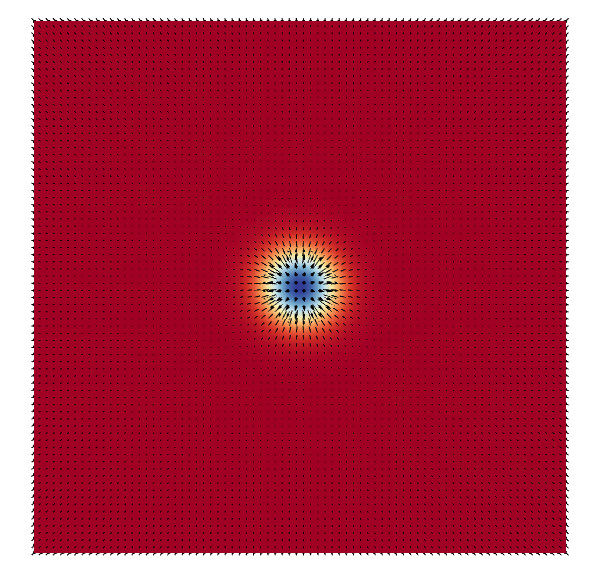

In [5]:
Image('skyrmion_up.png')

The script parameters descriptions are shown below:

    Relaxation of skyrmionic textures for 2D square films with interfacial DMI

    positional arguments:
      box_length            Length in nm
      box_width             Width in nm
      fd_max                Maximum edge length for the finite elements
      sim_name              Simulation name

    optional arguments:
      -h, --help            show this help message and exit
      --D D                 DMI constant in units of 1e-3 * J m^{-2}
      --A A                 Exchange constant in units of J m^{-1}
      --Ms MS               Saturation magnetisationin units of A / m
      --k_u K_U             Anisotropy constant in units of Jm^-3
      --B B                 External magnetic field perpendicular to the square
                            plane (z direction), in Tesla
      --pin_borders         Pin the magnetisation vectors at the box boundaries
      --PBC_2D              Two dimensional boundary condition
      --initial_state_skyrmion_down SK_INITIAL_RADIUS
                            This option puts a skyrmionic texture in the centre of
                            the nanotrack, as initial m configuration. The other
                            spins are in the (0, 0, 1) direction
      --initial_state_skyrmion_up SK_INITIAL_RADIUS
                            This option puts a skyrmionic texture with its core
                            pointing in the +z direction, in the centre of the
                            nanotrack, as initial m configuration. The other spins
                            are in the (0, 0, 1) direction
      --initial_state_ferromagnetic_up
                            This option sets the initial m configuration as a
                            ferromagnetic state in the (0, 0, 1) direction
      --initial_state_ferromagnetic_down
                            This option sets the initial m configuration as a
                            ferromagnetic state in the (0, 0, -1) direction
      --initial_state_irregular
                            This option sets the initial m configuration as an
                            irregular state (TESTING)
      --preview PREVIEW     Set to *yes* if a plot with m being updated is shown
                            instead of saving npy and vtk files
      --alpha ALPHA         Damping constant value
      --save_files SAVE_FILES
                            Save vtk and npy files every x nanoseconds
